# import all libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import numpy as np
import string
import math
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Loading the data in dataset

In [36]:
dataset1 = pd.read_csv('completeSpamAssassin.csv', usecols=['Body','Label'])

In [37]:
dataset1

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6041,empty,0
6042,___ ___ ...,0
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,empty,0


In [38]:
dataset2 = pd.read_csv('enronSpamSubset.csv')

In [39]:
dataset2

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...,...,...
9995,26222,26222,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,18630,18630,Subject: missing bloomberg deals\n stephanie -...,0
9997,18451,18451,Subject: eops salary survey questionnaire\n we...,0
9998,21955,21955,"Subject: q 3 comparison\n hi louise ,\n i have...",0


In [40]:
dataset3 = pd.read_csv('lingSpam.csv', usecols=['Body','Label'])

In [41]:
dataset3

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1
...,...,...
2600,Subject: computationally - intensive methods i...,0
2601,Subject: books : a survey of american linguist...,0
2602,Subject: wecol ' 98 - - western conference on ...,0
2603,Subject: euralex ' 98 - revised programme\n \n...,0


In [42]:
print('Dataset 1 shape:',dataset1.shape)
print('Dataset 2 shape:',dataset2.shape)
print('Dataset 3 shape:',dataset3.shape)

Dataset 1 shape: (6046, 2)
Dataset 2 shape: (10000, 4)
Dataset 3 shape: (2605, 2)


In [43]:
dataset1.iloc[3]['Body']

"##################################################\n#                                                #\n#                 Adult Club                     #\n#           Offers FREE Membership               #\n#                                                #\n##################################################>>>>>  INSTANT ACCESS TO ALL SITES NOW\n>>>>>  Your User Name And Password is.\n>>>>>  User Name: zzzz@spamassassin.taint.org\n>>>>>  Password: 7603825 of the Best Adult Sites on the Internet for FREE!\n---------------------------------------\nNEWS 08/18/02\nWith just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New\nMembers. Are you one of them yet???\n---------------------------------------\nOur Membership FAQQ. Why are you offering free access to 5 adult membership sites for free?\nA. I have advertisers that pay me for ad space so you don't have to pay for membership.Q. Is it true my membership is for life?\nA. Absolutely you'll never have to 

# Data Prepration

In [44]:
dataset1_1 = dataset1[['Body','Label']]
dataset2_1 = dataset2[['Body','Label']]
dataset3_1 = dataset3[['Body','Label']]

In [45]:
dataset1_1.head(3)


,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1


In [46]:
dataset2_1.head(3)

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1


In [47]:
dataset3_1.head(3)

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1


# concatenate the three dataset

In [48]:
df = pd.concat([dataset1_1,dataset2_1,dataset3_1],ignore_index=True).rename(columns={'Body':'Email','Label':'Spam'})

In [49]:
df.shape

(18651, 2)

# Data Cleaning

In [50]:
df.isnull().sum()

Email    1
Spam     0
dtype: int64

In [51]:
df.dropna(inplace=True)
df.shape

(18650, 2)

# Feature Engineering - adding of new features
New feature for email length
New feature for number of special characters in email
New feature for number of digits in email
New feature for number of spam trigger words present in email

In [52]:
df2=df

# New feature for email length

In [53]:
email_length=[]
for email in df2['Email']:
    email_length.append(len(email))
df2['Email Length'] = email_length

In [54]:
df2

,Email,Spam,Email Length
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,##############################################...,1,2863
4,I thought you might like these:\n1) Slim Down ...,1,641
...,...,...,...
18646,Subject: computationally - intensive methods i...,0,3446
18647,Subject: books : a survey of american linguist...,0,2627
18648,Subject: wecol ' 98 - - western conference on ...,0,818
18649,Subject: euralex ' 98 - revised programme\n \n...,0,497


# New feature for number of special characters in email

In [55]:
special_characters = []
for email in df2['Email']:
    special_characters_counter = 0
    for char in email:
        if not char.isalnum():
            special_characters_counter+=1
    special_characters.append(special_characters_counter)
      
df2['Special characters'] = special_characters

In [56]:
df2

,Email,Spam,Email Length,Special characters
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143
3,##############################################...,1,2863,1004
4,I thought you might like these:\n1) Slim Down ...,1,641,144
...,...,...,...,...
18646,Subject: computationally - intensive methods i...,0,3446,644
18647,Subject: books : a survey of american linguist...,0,2627,589
18648,Subject: wecol ' 98 - - western conference on ...,0,818,206
18649,Subject: euralex ' 98 - revised programme\n \n...,0,497,145


# New feature for number of digits in email

In [57]:
number_of_digits = []
for email in df2['Email']:
    counter = 0
    for ch in email:
        if ch.isdigit():
            counter += 1
    number_of_digits.append(counter)
df2['No of Digits'] = number_of_digits
df2

,Email,Spam,Email Length,Special characters,No of Digits
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331,5
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176,51
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143,51
3,##############################################...,1,2863,1004,106
4,I thought you might like these:\n1) Slim Down ...,1,641,144,34
...,...,...,...,...,...
18646,Subject: computationally - intensive methods i...,0,3446,644,32
18647,Subject: books : a survey of american linguist...,0,2627,589,18
18648,Subject: wecol ' 98 - - western conference on ...,0,818,206,11
18649,Subject: euralex ' 98 - revised programme\n \n...,0,497,145,17


# New feature for number of spam trigger words present in email
['buy','click','get','free','order','save','limited']


In [58]:
spam_trigger_words=['buy','click','get','free','order','save','limited']
trigger_words=[]

for email in df2['Email']:
    trigger_words_counter = 0
    email = email.split()
    for word in email:
        if word.lower() in spam_trigger_words:
            trigger_words_counter += 1
    trigger_words.append(trigger_words_counter)
df2['Trigger Words'] = trigger_words
df2

,Email,Spam,Email Length,Special characters,No of Digits,Trigger Words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331,5,9
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176,51,2
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143,51,2
3,##############################################...,1,2863,1004,106,8
4,I thought you might like these:\n1) Slim Down ...,1,641,144,34,2
...,...,...,...,...,...,...
18646,Subject: computationally - intensive methods i...,0,3446,644,32,0
18647,Subject: books : a survey of american linguist...,0,2627,589,18,2
18648,Subject: wecol ' 98 - - western conference on ...,0,818,206,11,1
18649,Subject: euralex ' 98 - revised programme\n \n...,0,497,145,17,1


# Exploratory Data Analysis

### Email Distribution

Text(0.5, 0, 'Emails')

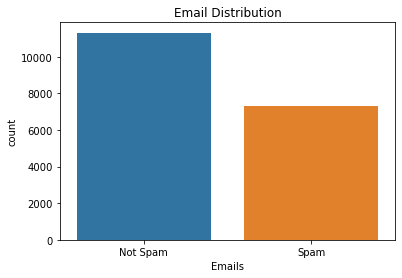

In [64]:
sns.countplot( x='Spam', data= df2)
plt.title("Email Distribution")
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.xlabel('Emails')

### Email length of spam and not spam emails
This helps cnvert float values to normal count value, Try without the lambda to check how the output looks like

In [70]:
pd.set_option('display.float_format', lambda x : '%.0f' %x)
df2['Email Length'].describe()

count      18650
mean        2776
std       125173
min            1
25%          417
50%          896
75%         1905
max     17085626
Name: Email Length, dtype: float64

Text(0.5, 0, 'Emails')

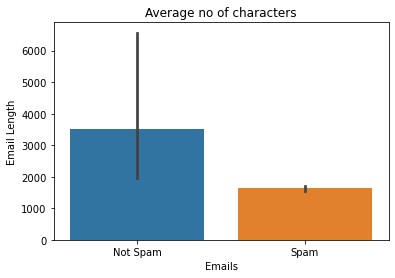

In [75]:
sns.barplot(x='Spam', y='Email Length',data=df2)
plt.title("Average no of characters")
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.xlabel('Emails')

### Special Characters in email

In [77]:
pd.set_option('display.float_format', lambda x : '%.0f' %x)
df2['Special characters'].describe()

count     18650
mean        751
std       35010
min           0
25%         107
50%         242
75%         515
max     4779145
Name: Special characters, dtype: float64

Text(0.5, 0, 'Emails')

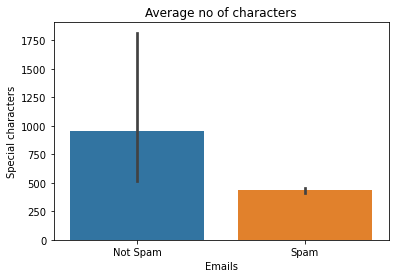

In [78]:
sns.barplot(x='Spam', y='Special characters',data=df2)
plt.title("Average no of Special characters")
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.xlabel('Emails')

### Digits count of spam and not spam emails

In [79]:
pd.set_option('display.float_format', lambda x : '%.0f' %x)
df2['No of Digits'].describe()

count    18650
mean        62
std       2714
min          0
25%          4
50%         17
75%         41
max     369911
Name: No of Digits, dtype: float64

Text(0.5, 0, 'Emails')

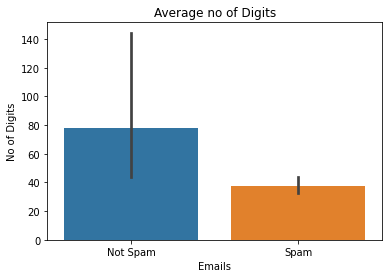

In [80]:
sns.barplot(x='Spam', y='No of Digits',data=df2)
plt.title("Average no of Digits")
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.xlabel('Emails')

### Spam trigger words 

In [82]:
pd.set_option('display.float_format', lambda x : '%.0f' %x)
df2['Trigger Words'].describe()

count   18650
mean        2
std        68
min         0
25%         0
50%         0
75%         1
max      9254
Name: Trigger Words, dtype: float64

Text(0.5, 0, 'Emails')

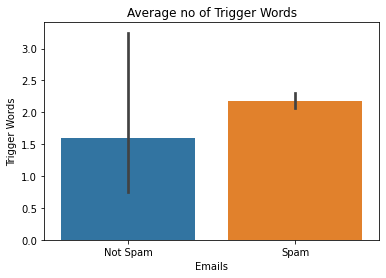

In [84]:
sns.barplot(x='Spam', y='Trigger Words',data=df2)
plt.title("Average no of Trigger Words")
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.xlabel('Emails')

# Data Preprocessing
    Remove subject, tabs and new lines

In [88]:
import re
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [90]:
df2.head()

,Email,Spam,Email Length,Special characters,No of Digits,Trigger Words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,331,5,9
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,176,51,2
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,143,51,2
3,##############################################...,1,2863,1004,106,8
4,I thought you might like these:\n1) Slim Down ...,1,641,144,34,2


In [93]:
# drop to records where the Length of email is more than 2000 and less that 15
df3=df2[(df2['Email Length']<2000) & (df2['Email Length']>15)]

In [94]:
df3.shape

(13650, 6)

In [95]:
df2.shape

(18650, 6)

# Data Cleaning

In [ ]:
corpus=[]
lemmatizer=WordNetLemmatizer()
for email in df3['Email']:
    removed_tab_newline=re.sub('[\n|\t]',' ', email)
    removed_Subject = re.sub('Subject :', ' ', removed_tab_newline)
    removed_special_Char = re.sub('[a-zA-Z]',' ',removed_Subject)
    lower_case_email =  removed_special_Char.lower()
    
    tokenized_email=lower_case_email.split()
    filtered_stopwords=[word for word in tokenized_email if word not in stopwords.words('english')]
    lemmatized_words=[lemmatizer.lemmatize(word) for word in filtered_stopwords]
    email=' '.join(lemmatized_words)
    corpus.append(email)

# Create Vectors

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df3['Spam']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print('Model score on test data:',classifier.score(X_test,y_test))

In [ ]:
cross_val_score(classifier,X_test,y_test)

In [ ]:
y_predicted = classifier.predict(X_test)

In [ ]:
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

In [ ]:
labels = ['Not spam','Spam']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
classification_report_result = classification_report(y_test,y_predicted)
print(classification_report_result)